In [3]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import gridspec
import matplotlib.patheffects as path_effects
from IPython.display import HTML

import math
import copy

import re
import numpy as np
from scipy.stats import gaussian_kde
from scipy.stats import spearmanr
from scipy.stats import linregress

import imp
bt = imp.load_source('baltic', '/Users/evogytis/Documents/baltic/baltic.py')

# import pandas as pd
import treetime

typeface='Helvetica Neue'

mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=22

def metricDistance(pointA,pointB):
    """ Calculate distance in kilometers along planet's surface from longitude and latitude. """
    R=6371 ## kilometers
    lon1,lat1=pointA
    lon2,lat2=pointB
    
    phi1=math.radians(lat1)
    phi2=math.radians(lat2)
    
    deltaPhi=math.radians(lat2-lat1)
    deltaLam=math.radians(lon2-lon1)
    
    a=math.sin(deltaPhi/2.0) * math.sin(deltaPhi/2.0) + math.cos(phi1) * math.cos(phi2) * math.sin(deltaLam/2.0) * math.sin(deltaLam/2.0)
    c = 2.0 * math.atan2(math.sqrt(a),math.sqrt(1-a))
    
    return R*c

colour_input=open('/Users/evogytis/Documents/genomic-horizon/data/plot/loc_data.txt','r')

locations=[]
location_to_country={}
normalized_coords={}
popCentres={}
colours={}
for line in colour_input:
    l=line.strip('\n').split('\t')
    if l[0]!='loc':
        loc,country,norm_coord,lon,lat,col=l

        locations.append(loc)
        location_to_country[loc]=country
        normalized_coords[loc]=float(norm_coord)
        popCentres[loc]=(float(lon),float(lat))
        colours[loc]=col
        
location_to_country['WesternArea']='SLE'
normalized_coords['WesternArea']=normalized_coords['WesternUrban']
popCentres['WesternArea']=popCentres['WesternUrban']
colours['WesternArea']=colours['WesternUrban']

masked_set=[]
for line in open('/Users/evogytis/Documents/genomic-horizon/data/masked_set.txt','r'):
    masked_set.append(line.strip('\n'))

print 'Done!'

Done!


In [4]:
tip_ages_beast={'gp':{},
          'genome':{}}
tip_ages_treetime={'gp':{},
          'genome':{}}

for gene in ['gp','genome']:
    for line in open('/Users/evogytis/Documents/genomic-horizon/data/plot/%s_ageHPDS.txt'%(gene),'r'):
        l=line.strip('\n').split('\t')
        if l[0]=='tip':
            pass
        else:
            tipName,intervals,integral=l
            integral=float(integral)
            intervals=[map(float,frag.split('-')) for frag in intervals.split(',')]
            
            tip_ages_beast[gene][tipName]=intervals
            
    for line in open('/Users/evogytis/Documents/genomic-horizon/data/plot/%s_ageInterval.txt'%(gene),'r'):
        l=line.strip('\n').split('\t')
        tipName,intervals=l
        intervals=map(float,intervals.split(','))
        
        tip_ages_treetime[gene][tipName]=intervals
    print len(tip_ages_beast[gene]),len(tip_ages_treetime[gene])
print 'Done!'

60 60
60 60
Done!


In [4]:
# root_path='/Users/evogytis/Documents/genomic-horizon/data/alignments/'

# gp=bt.tree()
# gn=bt.tree()
# trees=[gn,gp]

# tip_dates={} ## exact dates or uncertainty ranges for treetime inference

# for g,gene in enumerate(['genome','gp']):
#     ll=trees[g]
#     bt.make_tree(open(root_path+'Makona_600_%s.raxml.tree'%(gene),'r').read(),ll)
#     ll.treeStats()
    
#     tip_dates[gene]={k.numName:bt.decimalDate(k.numName.split('|')[-1]) if k.numName not in tip_ages_beast[gene] else (2013.91506849,2015.91506849) for k in ll.Objects if k.branchType=='leaf'}
    
# #     out=open(root_path+'Makona_600_%s.dates.txt'%(gene),'w')
# #     for k in ll.Objects:
# #         if k.branchType=='leaf':
# #             if k.numName in tip_ages[gene]:
# #                 out.write('%s,%s\n'%(k.numName,bt.decimalDate(k.numName.split('|')[-1])))
# #             else:
# #                 out.write('%s,%s\n'%(k.numName,bt.decimalDate(k.numName.split('|')[-1])))
                
# #     out.close()


Tree height: 0.001774
Tree length: 0.066613

Numbers of objects in tree: 1198 (598 nodes and 600 leaves)


Tree height: 0.003496
Tree length: 0.060408

Numbers of objects in tree: 1198 (598 nodes and 600 leaves)



In [5]:
root_path='/Users/evogytis/Documents/genomic-horizon/data/'
trees={}

for gene in ['genome','gp']:
#     tt = treetime.TreeTime(dates=tip_dates[gene], tree=root_path+'alignments/Makona_600_%s.raxml.tree'%(gene), aln=root_path+'Makona_600_%s.fasta'%(gene), gtr='HKY85')
#     trees[gene]=tt
#     tt.run(root='best', infer_gtr=True, Tc='skyline', resolve_polytomies=True, max_iter=10,debug=True,time_marginal=True)
    
#     for clade in tt.tree.find_clades():
#         parent=[par for par in tt.tree.find_clades() if clade in par] ## potential parents
#         if len(parent)>0: ## if there's a parent to choose from
#             parent=parent[-1] ## set parent
#             parent.branch_length=clade.numdate-parent.numdate ## set new branch length in time
#     treetime.treetime.treetime_to_newick(tt,'/Users/evogytis/Documents/genomic-horizon/data/trees/Makona_600_%s.tt_dated.tree'%(gene)) ## save tree
    
    ll=bt.tree()
    bt.make_tree(open('/Users/evogytis/Documents/genomic-horizon/data/trees/Makona_600_%s.tt_dated.tree'%(gene),'r').readline(),ll)
    ll.treeStats()
    highestTip=max([bt.decimalDate(k.numName.split('|')[-1]) for k in ll.Objects if k.height==ll.treeHeight])
    ll.setAbsoluteTime(highestTip)
    
    trees[gene]=ll


Tree height: 1.599440
Tree length: 78.730750
annotations present

Numbers of objects in tree: 809 (209 nodes and 600 leaves)


Tree height: 2.869400
Tree length: 280.507770
annotations present

Numbers of objects in tree: 642 (42 nodes and 600 leaves)



genome SpearmanrResult(correlation=0.8857210364140538, pvalue=5.482249467848096e-21) LinregressResult(slope=0.9030014238287309, intercept=195.40801343590738, rvalue=0.9127659302209109, pvalue=3.196299604343081e-24, stderr=0.05306265766318408)
0 genome
correct: 0.83 50 10 60
genome mean error: 9.662 days (mean absolute error: 29.239 days)
genome precision: 102.343 days
gp SpearmanrResult(correlation=0.38271827323052726, pvalue=0.002544733295548558) LinregressResult(slope=0.04835308884972232, intercept=1915.4146899406849, rvalue=0.04499079810050378, pvalue=0.7328482776231255, stderr=0.1409764400975514)
1 gp
correct: 0.53 32 28 60
GP mean error: 722.961 days (mean absolute error: 722.961 days)
GP precision: 339.731 days


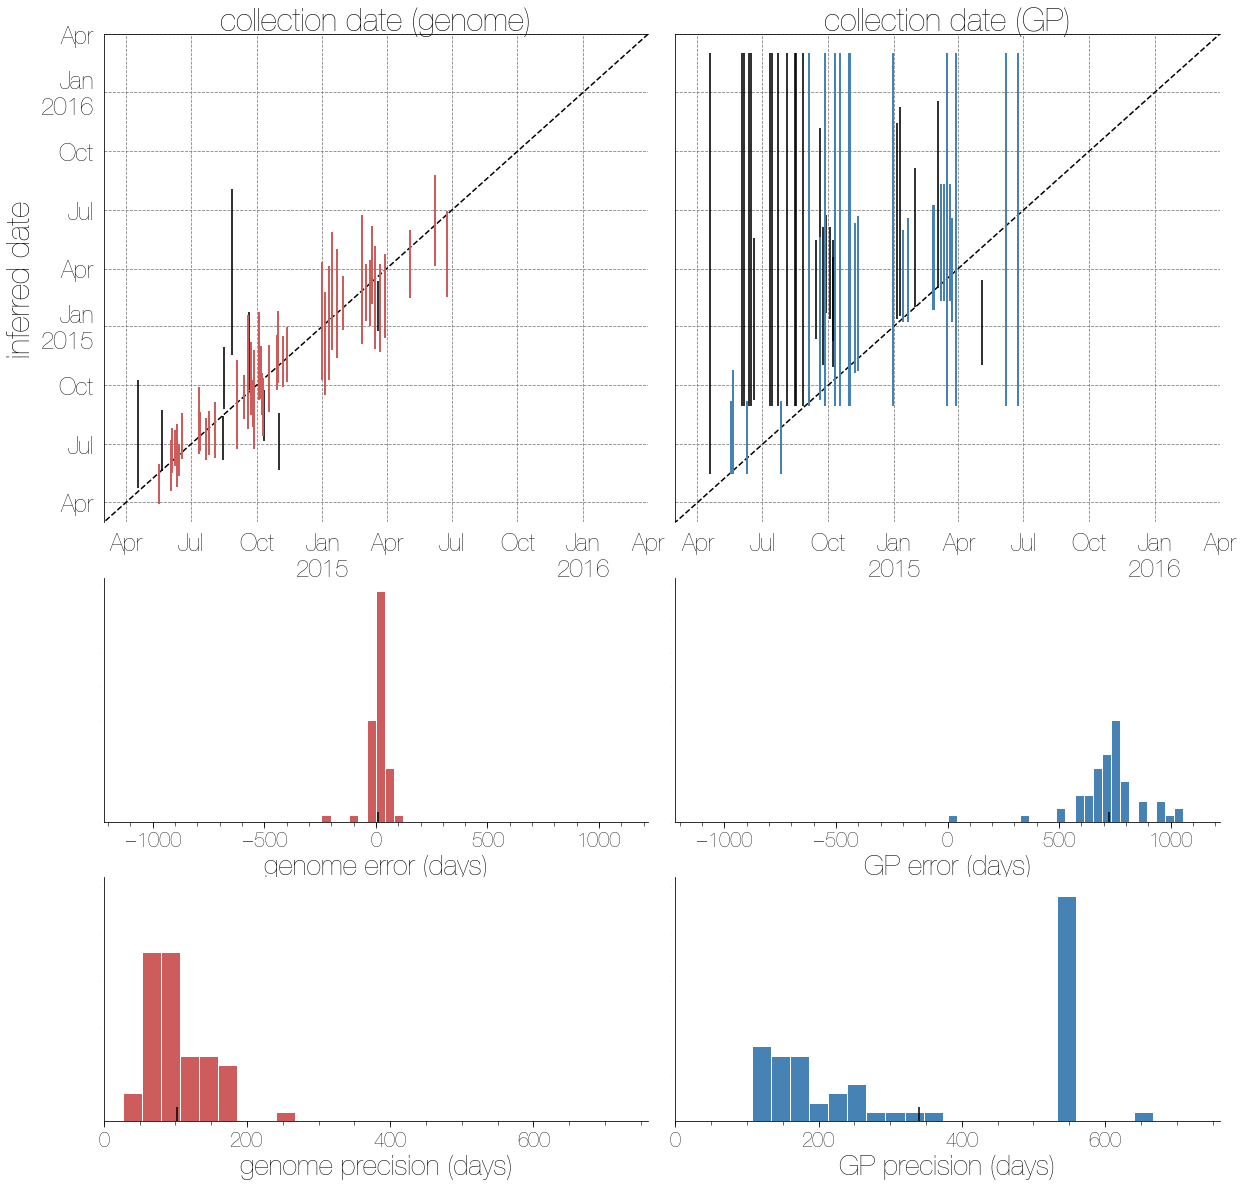

In [46]:
# fig = plt.figure(figsize=(20, 10)) 
# gs = gridspec.GridSpec(1, 2,wspace=0.1,hspace=0.15) ## setup figure with two columns
fig = plt.figure(figsize=(20, 20),facecolor='w') 
gs = gridspec.GridSpec(3, 2,height_ratios=[2,1,1],wspace=0.05,hspace=0.17) ## setup figure with two columns

locTrait='location.states'

for g,gene in enumerate(['genome','gp']):
    
#     output_date_ranges=open('/Users/evogytis/Documents/genomic-horizon/data/plot/%s_ageInterval.txt'%(gene),'w')
    
#     ax = plt.subplot(gs[g])
#     ax2 = plt.subplot(gs[g])
    ax = plt.subplot(gs[0,g])
    ax2 = plt.subplot(gs[1,g])
    ax3 = plt.subplot(gs[2,g])
    
    ll=trees[gene]
    
    if gene=='gp':
        aln=gene.upper()
    else:
        aln=gene
        
    fc=['indianred','steelblue'][g]
    
    correct=[]
    distances=[]
    precisions=[]
    test_x=[]
    test_y=[]
    
    masked_tips=tip_ages_treetime[gene].keys()
    
    for tipName in masked_tips:
        date=tipName.split('|')[-1]
        true_date=bt.decimalDate(date)
        
        if isinstance(ll,bt.tree):
            inferred_date=[k.absoluteTime for k in ll.Objects if k.branchType=='leaf' and k.numName==tipName][-1]
#             print [(k.numName,k.absoluteTime) for k in ll.Objects if k.branchType=='leaf' and k.numName==tipName]
            interval=tip_ages_treetime[gene][tipName]
        else:
            inferred_date=ll.leaves_lookup[tipName].numdate
            interval=ll.get_max_posterior_region(ll.leaves_lookup[tipName],fraction=0.95)

        test_x.append(true_date)
        test_y.append(inferred_date)
        
#         print tipName if true_date==inferred_date else ''
        distances.append((true_date-inferred_date)*365.0)
#         print distances[-1]
        
        al=0.8
        lw=2
        
#         output_date_ranges.write('%s\t%s\n'%(tipName,','.join(map(str,interval))))
        c='k'
        z=0
        start,end=interval
        precision=(end-start)*365.0 ## get span for every interval, convert to days
        if start<=true_date<=end:
            al=1.0
            c=fc
            lw=2
            z=1
            correct.append(1)
        else:
            correct.append(0)
        precisions.append(precision)
        ax.plot([true_date,true_date],interval,color=c,lw=lw,alpha=al,zorder=98+z)
    
    print gene,spearmanr(test_x,test_y),linregress(test_x,test_y)

    every=3
    all_mons=['2013-%02d-01'%(x) for x in range(10,13,1)]
    all_mons+=['2014-%02d-01'%(x) for x in range(1,13,1)]
    all_mons+=['2015-%02d-01'%(x) for x in range(1,13,1)]
    all_mons+=['2016-%02d-01'%(x) for x in range(1,5,1)]
    mons=[x for x in all_mons if (int(x.split('-')[1])-1)%every==0]

    ax.set_xticks(map(bt.decimalDate,mons))
    ax.set_yticks(ax.get_xticks())
    ax.set_xticklabels([bt.convertDate(x,'%Y-%m-%d','%b\n%Y') if x.split('-')[1]=='01' else bt.convertDate(x,'%Y-%m-%d','%b') for x in mons])
    ax.set_yticklabels(ax.get_xticklabels())
    
    ax.set_ylim(bt.decimalDate('2014-03-01'),bt.decimalDate('2016-04-01'))
    ax.set_xlim(ax.get_ylim())
    ax.plot([2012.0,2018.0],[2012.0,2018.0],ls='--',color='k')
    print g,gene
    if g==0:
        ax.set_ylabel('inferred date',size=32)
        ax.set_yticklabels(ax.get_xticklabels())
    else:
        ax.set_yticklabels([])

    ax.xaxis.set_label_position('top')
    ax.set_xlabel('collection date (%s)'%(aln),size=32)
    ax.grid(ls='--',color='grey')
    print 'correct: %.2f %d %d %d'%(np.mean(correct),correct.count(1),correct.count(0),len(correct))
    
    x_grid=np.linspace(0.0,1.7,400)
    
    ax.tick_params(size=0,labelsize=24,pad=10)
    
    mean_d=np.mean(distances)
#     print distances
    ax2.hist(distances,range=(-1220,1220),bins=60,facecolor=fc,edgecolor='w')
    ax2.eventplot([mean_d],color=['k'],linelengths=3,lineoffsets=0,zorder=100)
    ax2.set_xlim(-1220,1220)
    
    mean_p=np.mean(precisions)
    ax3.hist(precisions,range=(0,800),bins=30,facecolor=fc,edgecolor='w')
    ax3.eventplot([mean_p],color=['k'],linelengths=3,lineoffsets=0,zorder=100)
    ax3.set_xlim(0,760)
    
    print '%s mean error: %.3f days (mean absolute error: %.3f days)'%(aln,mean_d,np.mean(map(abs,distances)))
    print '%s precision: %.3f days'%(aln,mean_p)
    
    ax2.set_xlabel('%s error (days)'%(aln),size=28)
    ax3.set_xlabel('%s precision (days)'%(aln),size=28)

    [ax.spines[pos].set_color('none') for pos in ['bottom','right']]
    [ax2.spines[pos].set_color('none') for pos in ['right','top']]
    [ax3.spines[pos].set_color('none') for pos in ['right','top']]

    ax.tick_params(size=0,labelsize=24,pad=10)
    
    ax2.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(100))
    ax2.xaxis.set_major_locator(mpl.ticker.MultipleLocator(500))
    ax2.tick_params(axis='x',which='major',size=6,labelsize=20)
    ax2.tick_params(axis='x',which='minor',size=4,labelsize=0)
    ax2.tick_params(axis='y',size=0,labelsize=0)
    ax2.set_ylim(0,36)
    
    ax3.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(50))
    ax3.xaxis.set_major_locator(mpl.ticker.MultipleLocator(200))
    ax3.tick_params(axis='x',which='major',size=6,labelsize=20)
    ax3.tick_params(axis='x',which='minor',size=4,labelsize=0)
    ax3.tick_params(axis='y',size=0,labelsize=0)
    ax3.set_ylim(0,26)
    
    
#     output_date_ranges.close()
plt.savefig('/Users/evogytis/Documents/genomic-horizon/supp_figures/sfigX_treetimeDates.png',dpi=300,bbox_inches='tight')
plt.show()

In [6]:
# out_locs=open('/Users/evogytis/Documents/genomic-horizon/data/Makona_600_locs.masked.txt','w')
# out_locs.write('strain,loc\n')
accession_to_strain={}

for line in open('/Users/evogytis/Documents/genomic-horizon/data/alignments/Makona_600_gp.dates.txt','r'):
    strain,date=line.strip('\n').split(',')
    loc=strain.split('|')[4]
    accession='|'.join(strain.split('|')[1:3])
    accession_to_strain[accession]=strain
#     if loc=='WesternArea':
#         loc='WesternUrban'
#     elif loc=='':
#         loc='?'
        
#     if strain in masked_tips:
#         out_locs.write('%s,?\n'%(strain))
#     else:
#         out_locs.write('%s,%s\n'%(strain,loc))
    
# print len(accession_to_strain)
# out_locs.close()

In [106]:
# for gene in ['genome','gp']:
#     out_tree=open('/Users/evogytis/Documents/genomic-horizon/data/trees/Makona_600_%s.tt_dated_traited.tree'%(gene),'w')
    
#     ll=bt.loadNexus('/Users/evogytis/Documents/genomic-horizon/data/trees/Makona_600_%s.tt_dated.tree.mugration.nexus'%(gene),treestring_regex='Tree tree1=',absoluteTime=False)
    
#     for k in ll.Objects:
# #         print k.length
#         if k.branchType=='leaf':
#             acc='|'.join(k.numName.split('|')[1:3])

#             if acc in accession_to_strain:
#                 k.numName=accession_to_strain[acc]
#     ll.treeStats()
#     out_tree.write('%s\n'%(ll.toString(traits=['loc'],numName=True,nexus=True)))
#     out_tree.close()


Tree height: 1.420350
Tree length: 14.340190
annotations present

Numbers of objects in tree: 809 (209 nodes and 600 leaves)


Tree height: 1.238760
Tree length: 6.732610
annotations present

Numbers of objects in tree: 642 (42 nodes and 600 leaves)



In [9]:
tt_confidences={'genome':{},'gp':{}}

for gene in ['genome','gp']:
    for line in open('/Users/evogytis/Documents/genomic-horizon/data/trees/Makona_600_%s.trait_confidence.txt'%(gene),'r'):
        l=line.strip('\n').split(', ')
#         print l
        if 'name' in l[0]:
            header=l
        elif 'NODE' not in l[0]:
            strain=l[0]
            confidence=map(float,l[1:])
            
            acc='|'.join(strain.split('|')[1:3])
            
            if acc in accession_to_strain:
                strain=accession_to_strain[acc]
            max_idx=confidence.index(max(confidence))+1
            tt_confidences[gene][strain]={loc:float(prob) for loc,prob in zip(header,l)[1:]}
#             print sum(tt_confidences[gene][strain].values()),tt_confidences[gene][strain]
                
    print len(tt_confidences[gene])
print 'Done!'

600
600
Done!



genome
predicted accuracy (mean of best guess probabilities): 0.804
cross entropy: 12012.800 nats (assigning 0.0001 probability when true location has 0.0 probability)
incorrect (true location not in 95% highest probability set): 25
correct (true location == predicted): 0.432
mean prob of correct location: 0.489
mean probability-weighed distance between inferred and correct population centroids: 87.568 km

0.522364184102 559.725403428

GP
predicted accuracy (mean of best guess probabilities): 0.908
cross entropy: 24397.109 nats (assigning 0.0001 probability when true location has 0.0 probability)
incorrect (true location not in 95% highest probability set): 39
correct (true location == predicted): 0.259
mean prob of correct location: 0.315
mean probability-weighed distance between inferred and correct population centroids: 124.909 km

0.229591738816 364.824543041


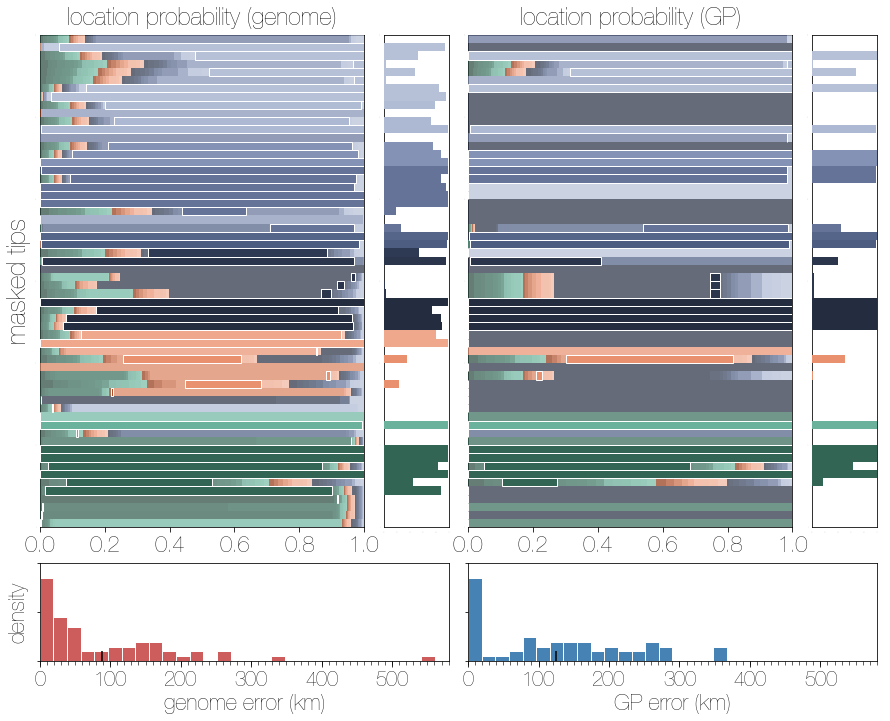

In [21]:
fig = plt.figure(figsize=(15, 15),facecolor='w') 

# L=len(data)
L=2

gs = gridspec.GridSpec(2, 2*L,height_ratios=[5,1],width_ratios=[5,1]*L,wspace=0.1,hspace=0.12,bottom=0.3) ## setup figure with two columns

for g,gene in enumerate(['genome','gp']): ## iterate over genome and GP trees
    D=[]
    ax = plt.subplot(gs[0,g*L]) ## probabilities
    ax1 = plt.subplot(gs[0,g*L+1]) ## one probability
    ax2 = plt.subplot(gs[1,g*L:g*L+2]) ## KDEs

    i=0
    entropy=0.0
    inf=0
    
    correct=[]
    max_guesses=[]
    correctCount=0
    masked_tips=tip_ages_treetime[gene].keys()
    
    for k in sorted(masked_tips,key=lambda q:(location_to_country[q.split('|')[4]],-normalized_coords[q.split('|')[4]],q)): ## iterate over tips
#         print gene,k,tt_confidences[gene]
        
        d=[] ## start new list for distances
        true_loc=k.split('|')[4] ## get correct location
        true_coord=popCentres[true_loc] ## get population centroid for correct location

        inferred=tt_confidences[gene][k]
#         print k,sum(inferred.values())
    
        if inferred.has_key(true_loc) and inferred[true_loc]==max(inferred.values()): ## if correct location not among guesses
            correct.append(inferred[true_loc])
        else:
            inf+=1
            correct.append(0.0)
        
        
        max_guesses.append(max(inferred.values())) ## log best guess
        bestGuess=[w for w in inferred if inferred[w]==max(inferred.values())][-1] ## get best guess

        if bestGuess==true_loc: ## count if best guess is correct
            correctCount+=1
        
        p=0.0

        for loc in sorted(locations,key=lambda q:(location_to_country[q],-normalized_coords[q])): ## iterate over all locations
            prob=0.0
            if inferred.has_key(loc): ## if location among guesses
                prob=inferred[loc] ## get probability of guess
                infer_coord=popCentres[loc] ## get coordinate of guess
                distance=metricDistance(true_coord,infer_coord)*prob ## multiply pop centroid distance by guess probability
                d.append(distance) ## remember guess distance
            fc=colours[loc] ## get colour
            ec='none'

            h=''
            al=0.7
            w=1.0
            if loc==true_loc: ## if guess is correct - change visuals

                al=1.0
                ax1.add_patch(plt.Rectangle((0.0,i),prob,w,facecolor=fc,edgecolor=ec,
                                       hatch=h,alpha=al,zorder=int(al*10)))
                ax1.plot()
                h=''
                ec='w'

    #                         ax.plot([p,p],[i,i+w],lw=1,color='w',zorder=100000)
    #                         ax.plot([p+prob,p+prob],[i,i+w],lw=1,color='w',zorder=100000)

            if inferred.has_key(true_loc): ## compute cross entropy
                entropy+=-np.log(inferred[true_loc]+0.0001)
            else:
                entropy+=-np.log(0.0001)
            ax.add_patch(plt.Rectangle((p,i),prob,w,facecolor=fc,edgecolor=ec,
                                       hatch=h,alpha=al,zorder=int(al*10))) ## add patch for every location
        
            p+=prob
        i+=1 ## next tip
        D.append(sum(d)) ## add distances to complete list
        
    ax.set_ylim(0,len(masked_tips))
    ax1.set_ylim(ax.get_ylim())
#     ax.set_yticks(range(len(masked_tip_names)+1))
    ax.tick_params(axis='y',size=0,labelsize=0)
    ax.tick_params(axis='x',size=5,labelsize=22)
    ax1.tick_params(size=0,labelsize=0)
    #ax.set_yticklabels(masked_tip_names)

    ax.set_xticks(np.linspace(0.0,1.0,6))

    ax.set_xlim(0,1)
    ax1.set_xlim(ax.get_xlim())
    
    if g==0:
        ax.set_ylabel('masked tips',size=26)
        label='genome'
    else:
        label='GP'
    
#     print '%s cross entropy: %s incorrect: %d mean prob: %s mean distance: %s'%(gene,entropy,inf,np.mean(correct),np.mean(D))
    print '\n%s\npredicted accuracy (mean of best guess probabilities): %.3f\ncross entropy: %.3f nats (assigning 0.0001 probability when true location has 0.0 probability)\nincorrect (true location not in 95%% highest probability set): %d\ncorrect (true location == predicted): %.3f\nmean prob of correct location: %.3f\nmean probability-weighed distance between inferred and correct population centroids: %.3f km\n'%(label,np.mean(max_guesses),entropy,inf,correctCount/float(len(locations)),np.mean(correct),np.mean(D))
    
    
    ax.xaxis.set_label_position('top')
    ax.xaxis.labelpad=10.0
    ax.set_xlabel('location probability (%s)'%(label),size=24)

    kde=gaussian_kde(D,bw_method=0.1)
    if g==0:
        fc='indianred'
        ax2.set_ylabel('density',size=22)
    else:
        fc='steelblue'

    x_grid=np.linspace(0,15,50)
    y_grid=kde.evaluate(x_grid)
#     ax2.hist(D,facecolor=fc,edgecolor='w',bins=30,range=(0,400))
    
#     ax2.eventplot([np.mean(D)],color=['k'],lineoffsets=0,linelengths=4,zorder=100)
#     ax2.fill_between(x_grid,y_grid,alpha=0.2,color=fc)
#     ax2.plot(x_grid,y_grid,lw=2,color=fc)
    ax2.hist(D,bins=30,facecolor=fc,edgecolor='w',range=(0,580))
    print min(D),max(D)
    ax2.eventplot([np.mean(D)],color=['k'],lineoffsets=0,linelengths=4)
    ax2.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
    ax2.set_xlim(0,580)
    ax2.set_ylim(0,20)
    ax2.set_xlabel('%s error (km)'%(label),size=22)
#     ax2.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))
#     ax2.set_xlim(0,10)
#     ax2.set_ylim(0.0,0.225)
    ax2.set_yticklabels([])
    ax2.set_xlabel('%s error (km)'%(label),size=22)
    ax2.tick_params(axis='x',labelsize=20,size=6)
    ax2.tick_params(axis='x',size=4,which='minor')
plt.savefig('/Users/evogytis/Documents/genomic-horizon/supp_figures/sfigX_treetimeLocations.png',dpi=300,bbox_inches='tight')
plt.show()


Tree height: 1.500440
Tree length: 78.631750
annotations present

Numbers of objects in tree: 809 (209 nodes and 600 leaves)


Tree height: 2.770400
Tree length: 280.408770
annotations present

Numbers of objects in tree: 642 (42 nodes and 600 leaves)



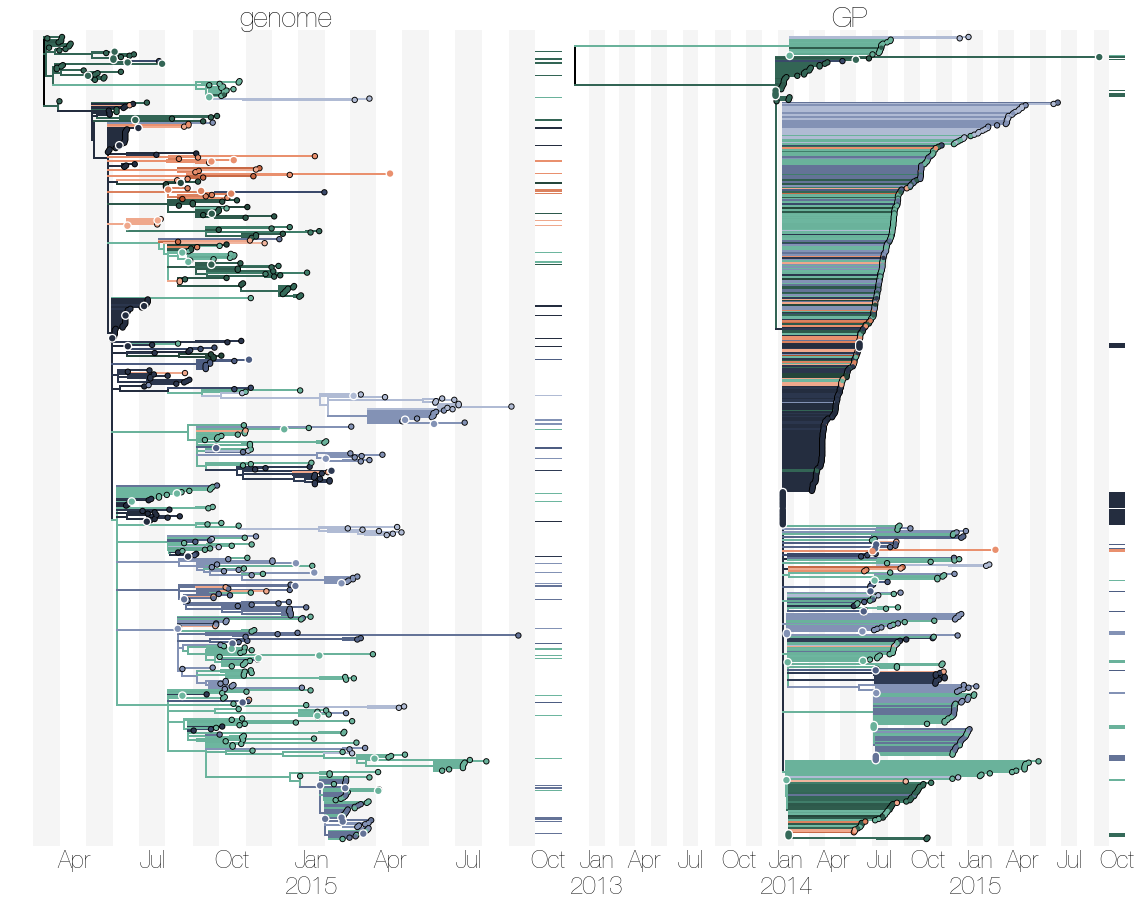

In [13]:
locTrait='loc'

fig = plt.figure(figsize=(20, 15),facecolor='w') 
gs = gridspec.GridSpec(1, 2,wspace=0.02) ## setup figure with two columns

branchWidth=2 ## line width for branches

for g,gene in enumerate(['genome','gp']):
    plot_tree=bt.loadNexus('/Users/evogytis/Documents/genomic-horizon/data/trees/Makona_600_%s.tt_dated_traited.tree'%(gene),treestring_regex='Tree [A-Za-z\\_]+([0-9]+)=')
    plot_tree.treeStats()
    
    for k in plot_tree.Objects:
        if k.branchType=='leaf':
            strain=k.numName
            acc='|'.join(strain.split('|')[1:3])
            
            if acc in accession_to_strain:
                k.name=accession_to_strain[acc]
                k.numName=accession_to_strain[acc]
                
    plot_tree.setAbsoluteTime(max([bt.decimalDate(k.numName.split('|')[-1]) for k in plot_tree.Objects if k.branchType=='leaf']))
    plot_tree.sortBranches()
    
    ax = plt.subplot(gs[g])
    
    if gene=='gp':
        aln=gene.upper()
    elif gene=='genome':
        aln=gene
    ax.xaxis.set_label_position('top')
    ax.set_xlabel(aln,size=28)
    
    for k in plot_tree.Objects: ## iterate over branches in the tree
#         print k.traits
        if locTrait in k.traits:
            location=k.traits[locTrait] ## get inferred location of branch
            c=colours[location] ## get colour of location
        else:
            location='?'
            c='k'
        
        y=k.y ## get y coordinates
        yp=k.parent.y ## get parent's y coordinate

        x=k.absoluteTime ## x coordinate is absolute time
        xp=k.parent.absoluteTime ## get parent's absolute time
        
#         print x,y
        z=0
        ec='k'
        tipSize=20 ## tip circle radius
        if k.branchType=='leaf':
            loc=k.numName.split('|')[4]
#                 print k.traits['%s.set'%(locTrait)]
            if k.numName in tip_ages_beast[gene]:
                ec='w'
                tipSize=40
                z=2
            elif loc=='?' or len(k.numName.split('|')[-1].split('-'))<3:
#                     print k.name
                ec='w'
                tipSize=10

#             print tipSize
        if k.branchType=='leaf': ## if tip...
            ax.scatter(x,y,s=tipSize,facecolor=c,edgecolor='none',zorder=100+z) ## put a circle at each tip
            ax.scatter(x,y,s=tipSize*2,facecolor=ec,edgecolor='none',zorder=99+z)
            
#             print k.absoluteTime,k.numName
            if k.numName in tip_ages_beast[gene]:
#                 ax.plot([x,2016.0],[y,y],ls='--',color=c,zorder=90)
                ax.add_patch(plt.Rectangle((bt.decimalDate('2015-10-01'),y-0.5),0.25,1.0,facecolor=c,edgecolor='none',zorder=100+z))

        elif k.branchType=='node': ## if node...
            yl=k.children[0].y ## get y coordinates of first and last child
            yr=k.children[-1].y

            if xp==0.0:
                xp=x

            ax.plot([x,x],[yl,yr],color=c,lw=branchWidth,zorder=98) ## plot vertical bar connecting node to both its offspring

        ax.plot([x,xp],[y,y],color=c,lw=branchWidth,zorder=98) ## plot horizontal branch to parent

    ax.xaxis.tick_bottom() ## tick bottom
    ax.yaxis.tick_left() ## tick left
    xDates=['2012-%02d-01'%x for x in range(1,13)]
    xDates+=['2013-%02d-01'%x for x in range(1,13)] ## create a timeline centered on each month
    xDates+=['2014-%02d-01'%x for x in range(1,13)]
    xDates+=['2015-%02d-01'%x for x in range(1,11)]
    every=3
    [ax.axvspan(bt.decimalDate(xDates[x]),bt.decimalDate(xDates[x])+1/float(12),facecolor='k',edgecolor='none',alpha=0.04) for x in range(0,len(xDates),2)] ## grey vertical bar every second month
    ax.set_xticks([bt.decimalDate(x)+1/24.0 for x in xDates if (int(x.split('-')[1])-1)%every==0]) ## x ticks in the middle of each month
    ax.set_xticklabels([bt.convertDate(x,'%Y-%m-%d','%b\n%Y') if x.split('-')[1]=='01' else bt.convertDate(x,'%Y-%m-%d','%b') for x in xDates if (int(x.split('-')[1])-1)%every==0]) ## labels in mmm format unless January: then do YYYY-mmm

    ax.spines['top'].set_visible(False) ## make axes invisible
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    ax.tick_params(axis='x',labelsize=24,size=0) ## no axis labels visible except for timeline
    ax.tick_params(axis='y',size=0)
    ax.set_yticklabels([])
    if gene=='gp':
        ax.set_xlim(bt.decimalDate('2012-12-01'),bt.decimalDate('2015-11-01')) ## bounds on axis limits
    else:
        ax.set_xlim(bt.decimalDate('2014-02-01'),bt.decimalDate('2015-11-01')) ## bounds on axis limits
    ax.set_ylim(-4,plot_tree.ySpan+5)

plt.savefig('/Users/evogytis/Documents/genomic-horizon/supp_figures/sfigX_treetimeTrees.png',dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
# # from treetime import TreeTime
# # import zipfile
# # from StringIO import StringIO

# # with zipfile.ZipFile("/Users/evogytis/Documents/structured-mers/data/figure 1-source data 1.zip", "r") as f:
# #     for name in f.namelist():
# #         if 'mcc.tree' in name:
# #             print name
# #             data = f.read(name)
# #             bt_tree=bt.loadNexus(StringIO(data))
# #             bt_tree.treeStats()

# aln='/Users/evogytis/Documents/genomic-horizon/data/alignments/Makona_600_gp.fasta'
# tre='/Users/evogytis/Documents/genomic-horizon/data/alignments/Makona_600_genome.raxml.tree'

# # out_new=open(tre,'w')
# # out_new.write('%s\n'%(bt_tree.toString()))
# # out_new.close()
# tip_dates={k.name:bt.decimalDate(k.name.split('|')[-1],variable=True) for k in bt_tree.Objects if k.branchType=='leaf'}
# tt = treetime.TreeTime(dates=tip_dates, tree=tre, aln=aln, gtr='HKY85',infer_gtr=True,store_compressed=False)
# tt.infer_ancestral_sequences(method='ml')


Tree height: 0.001650
Tree length: 0.067720
annotations present

Numbers of objects in tree: 810 (210 nodes and 600 leaves)

Total number of mutations in GP: 126
Maximum nesting: 5


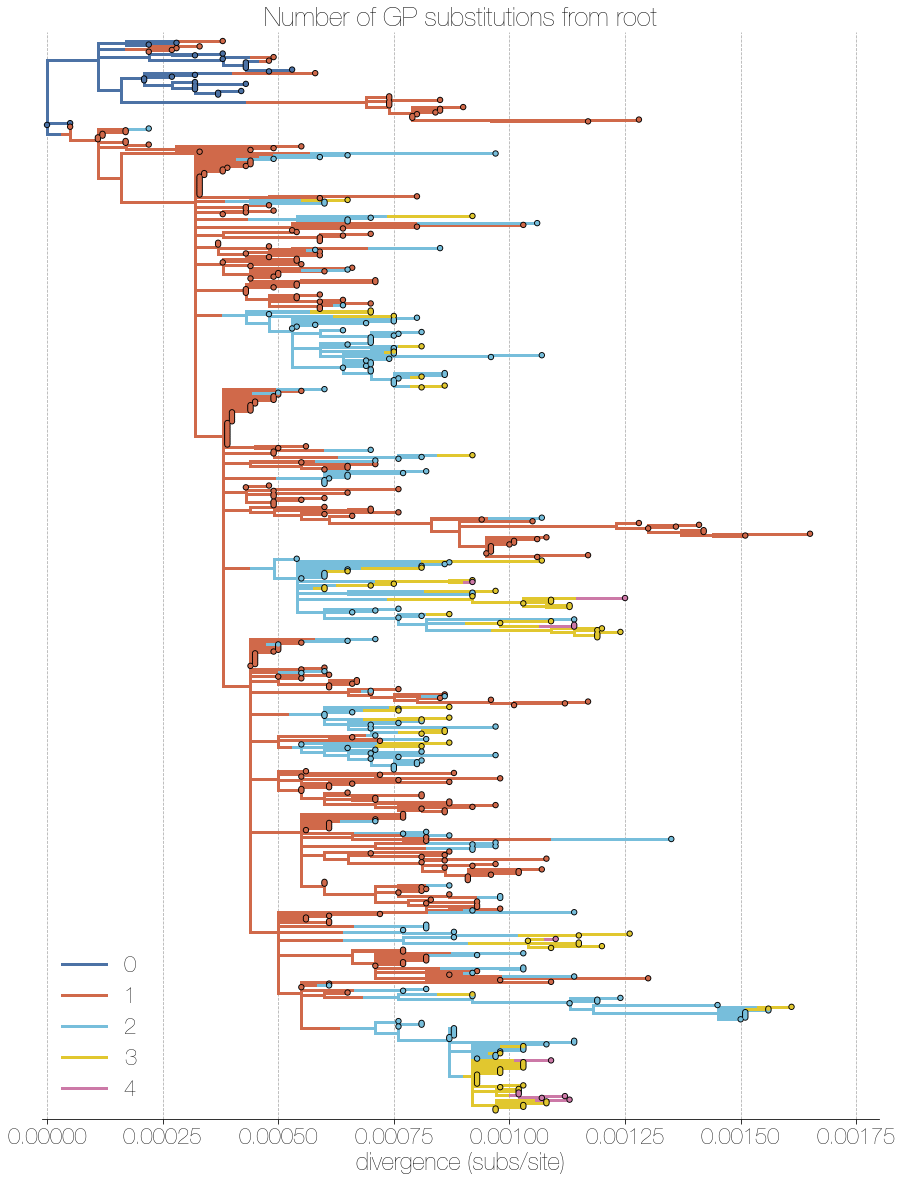

In [35]:
root_path='/Users/evogytis/Documents/genomic-horizon/data/'
aln_file=open(root_path+'alignments/Makona_600_genome.anc.fasta','r')
aln={}

for line in aln_file:
    l=line.strip('\n')
    if '>' in l:
        name=l[1:]
    else:
        aln[name]=l

ll=bt.tree()
bt_tree=bt.make_tree(open(root_path+'trees/Makona_600_genome.anc.tree').readline(),ll)
ll.root.children[-1].length=0.0
ll.treeStats()
# ll.setAbsoluteTime(max([bt.decimalDate(k.numName.split('|')[-1]) for k in ll.Objects if k.branchType=='leaf']))
ll.sortBranches()

fig = plt.figure(figsize=(15, 20),facecolor='w') 
gs = gridspec.GridSpec(1, 1,wspace=0.01) ## setup figure with two columns
ax = plt.subplot(gs[0])

for k in ll.Objects:
    if k.branchType=='leaf':
        k.traits['label']=k.numName
        
    k.traits['seq']=aln[k.traits['label']]
    k.traits['mutation']={}
    k.traits['dist']=0
        
for k in ll.Objects:
    kp=k.parent
    
    if kp!=ll.root:
        seq_pairs=zip(kp.traits['seq'],k.traits['seq'])
        for i in range(len(seq_pairs)):
            if len(set(seq_pairs[i]))>1 and 6051<=i<=8082:
#             if len(set(seq_pairs[i]))>1:
                k.traits['mutation'][i]='%s'%(''.join(seq_pairs[i]))
#                 ax.text(k.height-k.length/2.0, k.y, '%d %s'%(i-6051,'>'.join(seq_pairs[i])),va='top',ha='center')
                
for k in ll.traverse_tree(include_all=True):
    if 'mutation' in k.traits:
        if len(k.traits['mutation'])>0:
            if k.branchType=='node':
                clade=ll.traverse_tree(startNode=k,include_all=True)
                for q in clade:
                    q.traits['dist']+=1
            elif k.branchType=='leaf':
                k.traits['dist']+=1
print 'Total number of mutations in GP: %d'%(sum([len(k.traits['mutation']) for k in ll.Objects if 'mutation' in k.traits]))
print 'Maximum nesting: %d'%(len(set([k.traits['dist'] for k in ll.Objects])))

# def fun(x):
#     if 'dist' in x.parent.traits:
#         return x.traits['dist']==x.parent.traits['dist']
    
# for i in range(5):
#     ll=ll.collapseBranches(fun)
# ll.sortBranches()


branchWidth=3

colours=[mpl.cm.Set1(i) for i in np.linspace(0,1,8)]
PB1=(0.2981622478541206, 0.44644367598435458, 0.64719724652229571)
PB2=(0.28098424626331703, 0.63955403192370541, 0.39507882933990629)
PA=(0.8162552973803352, 0.41062668737243202, 0.29078047883276847)
HA=(0.88366013765335083, 0.77908497055371606, 0.18562091886997223)
NP=(0.8, 0.4745098039215686, 0.6549019607843137)
NA=(0.4666666666666667, 0.7450980392156863, 0.8588235294117647)
MP=(0.49803923567136127, 0.43267975250879925, 0.52287583549817396)
NS=(0.8, 0.7552941176470589, 0.5929411764705883)
colours=[PB1,PA,NA,HA,NP,PB2,NS,MP]
# colours=[NS,PB2,PB1,NA,MP,NP]
# colours=[NS,PA,NA,MP,PB2]


for k in ll.Objects: ## iterate over branches in the tree
    y=k.y ## get y coordinates
    yp=k.parent.y ## get parent's y coordinate

    x=k.height ## x coordinate is absolute time
    xp=k.parent.height ## get parent's absolute time
    
    c=colours[k.traits['dist']%len(colours)]
    z=k.traits['dist']
    ec='k'
    tipSize=20 ## tip circle radius
    
    if k.branchType=='leaf': ## if tip...
        ax.scatter(x,y,s=tipSize,facecolor=c,edgecolor='none',zorder=200+z) ## put a circle at each tip
        ax.scatter(x,y,s=tipSize*2,facecolor=ec,edgecolor='none',zorder=199+z)
    
    elif k.branchType=='node': ## if node...
        yl=k.children[0].y ## get y coordinates of first and last child
        yr=k.children[-1].y

        if xp==0.0:
            xp=x

        ax.plot([x,x],[yl,yr],color=c,lw=branchWidth,zorder=98+z,label=k.traits['dist']) ## plot vertical bar connecting node to both its offspring
    
    if 'dist' in k.parent.traits and k.traits['dist']!=k.parent.traits['dist']:
        pc=colours[k.parent.traits['dist']%len(colours)]
        ax.plot([x,xp+k.length/2.0],[y,y],color=c,lw=branchWidth,zorder=98+z) ## plot horizontal branch to parent
        ax.plot([x-k.length/2.0,xp],[y,y],color=pc,lw=branchWidth,zorder=98+z) ## plot horizontal branch to parent
    else:
        ax.plot([x,xp],[y,y],color=c,lw=branchWidth,zorder=98+z) ## plot horizontal branch to parent


ax.set_title('Number of GP substitutions from root',fontdict={'family':typeface,'weight':300})
ax.legend(loc=3,frameon=False)
ax.xaxis.tick_bottom() ## tick bottom
ax.yaxis.tick_left() ## tick left

ax.spines['top'].set_visible(False) ## make axes invisible
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.set_xlabel('divergence (subs/site)',size=24)
ax.tick_params(axis='x',labelsize=22,size=5) ## no axis labels visible except for timeline
ax.tick_params(axis='y',size=0)
ax.set_yticklabels([])
ax.grid(axis='x',ls='--')
ax.set_xlim(-0.00001,0.0018)
# ax.set_xlim(bt.decimalDate('2014-04-01'),bt.decimalDate('2015-11-01')) ## bounds on axis limits
ax.set_ylim(-4,ll.ySpan+5)
# plt.savefig('/Users/evogytis/Documents/genomic-horizon/supp_figures/sfigX_embedding.png',dpi=300,bbox_inches='tight')
plt.show()


Tree height: 0.001650
Tree length: 0.067720
annotations present

Numbers of objects in tree: 810 (210 nodes and 600 leaves)

Total number of mutations in GP: 1239
Maximum nesting: 17


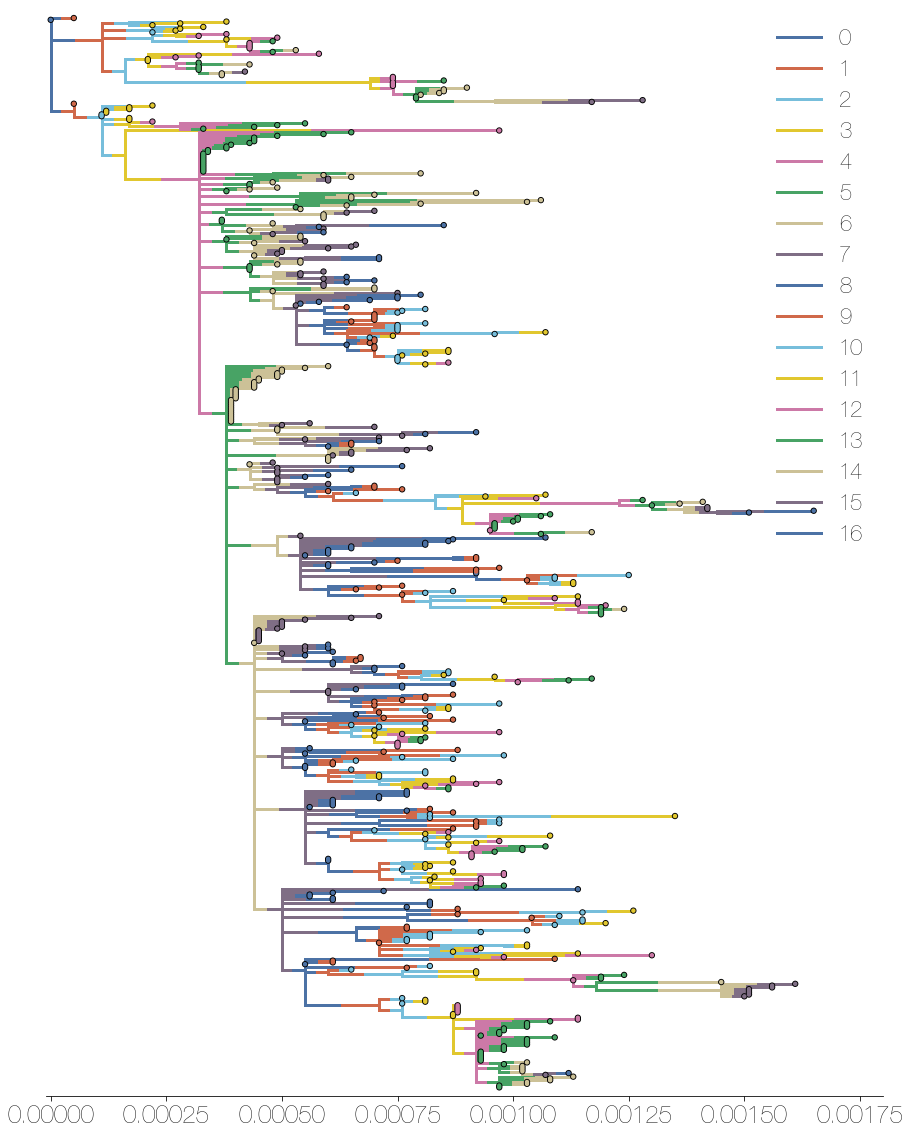

In [37]:
root_path='/Users/evogytis/Documents/genomic-horizon/data/'

ll=bt.tree()
bt_tree=bt.make_tree(open(root_path+'trees/Makona_600_genome.anc.tree').readline(),ll)
ll.root.children[-1].length=0.0


ll.treeStats()
# ll.setAbsoluteTime(max([bt.decimalDate(k.numName.split('|')[-1]) for k in ll.Objects if k.branchType=='leaf']))
ll.sortBranches()

for k in ll.Objects:
    if k.branchType=='leaf':
        k.traits['label']=k.numName
        
    k.traits['seq']=aln[k.traits['label']]
    k.traits['mutation']={}
    k.traits['dist']=0
        
for k in ll.Objects:
    kp=k.parent
    
    if kp!=ll.root:
        seq_pairs=zip(kp.traits['seq'],k.traits['seq'])
        for i in range(len(seq_pairs)):
            if len(set(seq_pairs[i]))>1:
#             if len(set(seq_pairs[i]))>1:
                k.traits['mutation'][i]='%s'%(''.join(seq_pairs[i]))

for k in ll.traverse_tree(include_all=True):
    if k.length>0.0 and k.parent!=ll.root:
        if k.branchType=='node':
            clade=ll.traverse_tree(startNode=k,include_all=True)
            for q in clade:
                q.traits['dist']+=1
        elif k.branchType=='leaf':
            k.traits['dist']+=1

for i in range(10):
#     ll=ll.collapseBranches(lambda x:x.length==0.0 or x.traits['dist']==x.parent.traits['dist'])
    ll=ll.collapseBranches(lambda x:x.length==0.0 or x.traits['dist']==x.parent.traits['dist'])
ll.sortBranches()

print 'Total number of mutations in GP: %d'%(sum([len(k.traits['mutation']) for k in ll.Objects if 'mutation' in k.traits]))
print 'Maximum nesting: %d'%(len(set([k.traits['dist'] for k in ll.Objects])))
         
fig = plt.figure(figsize=(15, 20),facecolor='w') 
gs = gridspec.GridSpec(1, 1,wspace=0.01) ## setup figure with two columns
ax = plt.subplot(gs[0])

branchWidth=3


ll.traverse_tree()

for k in ll.Objects: ## iterate over branches in the tree
    y=k.y ## get y coordinates
    yp=k.parent.y ## get parent's y coordinate

    x=k.height ## x coordinate is absolute time
    xp=k.parent.height ## get parent's absolute time
    
    c=colours[k.traits['dist']%len(colours)]
    z=k.traits['dist']
    ec='k'
    tipSize=20 ## tip circle radius
    
    if k.branchType=='leaf': ## if tip...
        ax.scatter(x,y,s=tipSize,facecolor=c,edgecolor='none',zorder=200+z) ## put a circle at each tip
        ax.scatter(x,y,s=tipSize*2,facecolor=ec,edgecolor='none',zorder=199+z)
    
    elif k.branchType=='node': ## if node...
        yl=k.children[0].y ## get y coordinates of first and last child
        yr=k.children[-1].y

        if xp==0.0:
            xp=x

        ax.plot([x,x],[yl,yr],color=c,lw=branchWidth,zorder=98+z) ## plot vertical bar connecting node to both its offspring
        
    if 'dist' in k.parent.traits and k.traits['dist']!=k.parent.traits['dist']:
        pc=colours[k.parent.traits['dist']%len(colours)]
        ax.plot([x-k.length/2.0,xp],[y,y],color=pc,lw=branchWidth,zorder=98+z,label=k.parent.traits['dist']) ## plot horizontal branch to parent
        ax.plot([x,xp+k.length/2.0],[y,y],color=c,lw=branchWidth,zorder=98+z,label=k.traits['dist']) ## plot horizontal branch to parent
        
    else:
        ax.plot([x,xp],[y,y],color=c,lw=branchWidth,zorder=98+z) ## plot horizontal branch to parent

ax.legend(loc=1,frameon=False)
ax.xaxis.tick_bottom() ## tick bottom
ax.yaxis.tick_left() ## tick left

ax.spines['top'].set_visible(False) ## make axes invisible
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)

ax.tick_params(axis='x',labelsize=24,size=5) ## no axis labels visible except for timeline
ax.tick_params(axis='y',size=0)
ax.set_yticklabels([])

ax.set_xlim(-0.00001,0.0018)
# ax.set_xlim(-0.00001,0.0035)
# ax.set_xlim(bt.decimalDate('2014-04-01'),bt.decimalDate('2015-11-01')) ## bounds on axis limits
ax.set_ylim(-4,ll.ySpan+5)

plt.show()


Tree height: 0.003040
Tree length: 0.079780
annotations present

Numbers of objects in tree: 642 (42 nodes and 600 leaves)


Tree height: 0.001650
Tree length: 0.067720
annotations present

Numbers of objects in tree: 810 (210 nodes and 600 leaves)

genomic slope: 0.8161e-3 r: 0.87 error: 0.0000
GP slope: 0.7338e-3 r: 0.36 error: 0.0001


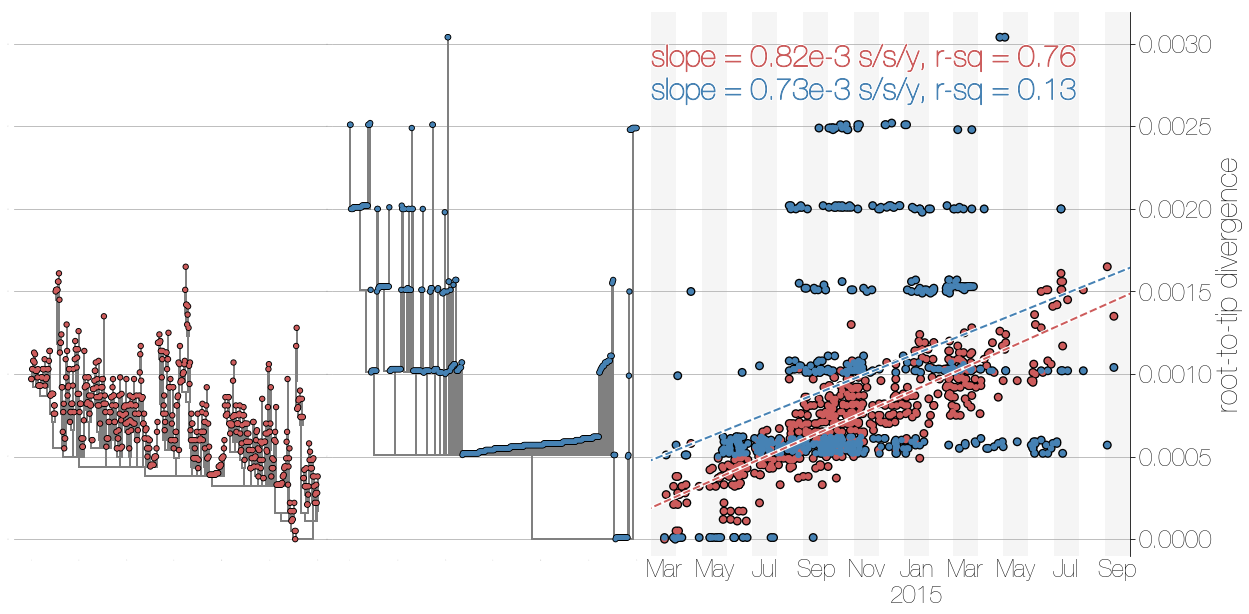

In [27]:
fig = plt.figure(figsize=(20,10),facecolor='w')
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1.5],hspace=0.0,wspace=0.0)

rtt = plt.subplot(gs[2])

pruned_gp=bt.tree()
bt.make_tree(open(root_path+'trees/Makona_600_gp.rooted.tree').readline(),pruned_gp)
pruned_gp.root.children[-1].length=0.0
pruned_gp=pruned_gp.collapseBranches(lambda x:x.height!=None and x.length==0.0)
pruned_gp.sortBranches(descending=True)
pruned_gp.treeStats()

pruned_genomic=bt.tree()
bt.make_tree(open(root_path+'trees/Makona_600_genome.rooted.tree').readline(),pruned_genomic)
pruned_genomic.root.children[-1].length=0.0
pruned_genomic=pruned_genomic.collapseBranches(lambda x:x.length==0.0 and x.height!=None)
pruned_genomic.sortBranches(descending=True)
pruned_genomic.treeStats()

#########################

tipSize=20 ## tip circle radius
branchWidth=2 ## line width for branches

for t,tr in enumerate([pruned_genomic,pruned_gp]):
    ax=plt.subplot(gs[t],sharey=rtt)
    c=['indianred','steelblue'][t]
    alignment=['genomic','GP'][t]
    for k in tr.Objects: ## iterate over branches in the tree
        y=k.y ## get y coordinates
        x=k.height ## x coordinate is absolute time

        if k.parent is None:
            xp=x
            yp=y
        else:
            yp=k.parent.y ## get parent's y coordinate
            xp=k.parent.height ## get parent's absolute time

        if isinstance(k,bt.leaf): ## if tip...
            ax.scatter(y,x,s=tipSize,facecolor=c,edgecolor='none',zorder=100) ## put a circle at each tip
            ax.scatter(y,x,s=tipSize*2,facecolor='k',edgecolor='none',zorder=99)

        elif k.branchType=='node': ## if node...
            ypos=[w.y for w in k.children]
            yl=min(ypos) ## get y coordinates of first and last child
            yr=max(ypos)
            
            ax.plot([yl,yr],[x,x],color='grey',lw=branchWidth,zorder=98) ## plot vertical bar connecting node to both its offspring
        ax.plot([y,y],[x,xp],color='grey',lw=branchWidth,zorder=98) ## plot horizontal branch to parent

    tips=[k for k in tr.Objects if k.branchType=='leaf']
    xs=[bt.decimalDate(k.numName.split('|')[-1]) for k in tips]
    ys=[k.height for k in tips]
    
    rtt.scatter(xs,ys,s=40,zorder=100,facecolor=c, edgecolor='none')
    rtt.scatter(xs,ys,s=80,zorder=99,facecolor='k', edgecolor='none')

    slope,intercept,r,p,err=linregress(xs,ys)
    regression_xs=np.linspace(bt.decimalDate('2013-12-01'),bt.decimalDate('2015-11-01'),10)
    rtt.plot(regression_xs,[x*slope+intercept for x in regression_xs],ls='--',lw=2,color=c,zorder=102)
    rtt.plot(regression_xs,[x*slope+intercept for x in regression_xs],ls='-',lw=4,color='w',zorder=101)
    
    effects=[path_effects.Stroke(linewidth=3, foreground='w'),
                 path_effects.Stroke(linewidth=1, foreground=c)] ## black text, white outline
    rtt.text(bt.decimalDate('2014-03-01'),0.003-t*0.0002,r'slope = %.2fe-3 s/s/y, r-sq = %.2f'%(slope*1000.0,r**2),size=30,ha='left',va='top',path_effects=effects)
    
    print '%s slope: %.4fe-3 r: %.2f error: %.4f'%(alignment,slope*1000.0,r,err)
    
    ax.xaxis.tick_bottom() ## tick bottom
    ax.yaxis.tick_left() ## tick left
    
    ax.tick_params(size=0,labelsize=0)
    ax.spines['top'].set_visible(False) ## make axes invisible
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.grid(axis='y')
####################


xDates=['2013-%02d-01'%x for x in range(11,13)] ## create a timeline centered on each month
xDates+=['2014-%02d-01'%x for x in range(1,13)]
xDates+=['2015-%02d-01'%x for x in range(1,12)]

[rtt.axvspan(bt.decimalDate(xDates[x]),bt.decimalDate(xDates[x])+1/float(12),facecolor='k',edgecolor='none',alpha=0.04) for x in range(0,len(xDates),2)] ## grey vertical bar every second month
rtt.set_xticks([bt.decimalDate(xDates[x])+1/24.0 for x in range(0,len(xDates),2)]) ## x ticks in the middle of each month
rtt.set_xticklabels([bt.convertDate(xDates[x],'%Y-%m-%d','%b\n%Y') if xDates[x].split('-')[1]=='01' else bt.convertDate(xDates[x],'%Y-%m-%d','%b') for x in range(0,len(xDates),2)]) ## labels in mmm format unless January: then do YYYY-mmm

rtt.spines['top'].set_visible(False) ## make axes invisible
# rtt.spines['right'].set_visible(False)
rtt.spines['left'].set_visible(False)
rtt.spines['bottom'].set_visible(False)

rtt.set_ylabel('root-to-tip divergence',size=30)
rtt.yaxis.set_label_position('right')
rtt.yaxis.tick_right()

rtt.tick_params(axis='x',labelsize=24,size=0) ## no axis labels visible except for timeline
rtt.tick_params(axis='y',size=5,labelsize=24)

rtt.grid(axis='y')
rtt.set_ylim(-0.0001,pruned_gp.treeHeight*1.05)
rtt.set_xlim(bt.decimalDate(xDates[4]),bt.decimalDate(xDates[-2]))
plt.savefig('/Users/evogytis/Documents/genomic-horizon/supp_figures/sfigX_rtt.png',dpi=300,bbox_inches='tight')
plt.show()

In [6]:
root_path='/Users/evogytis/Documents/genomic-horizon/data/'
pruned_gp=bt.tree()
bt.make_tree(open(root_path+'trees/Makona_600_gp.rooted.tree').readline(),pruned_gp)
pruned_gp.root.children[-1].length=0.0
pruned_gp=pruned_gp.collapseBranches(lambda x:x.height!=None and x.length==0.0)
pruned_gp.sortBranches(descending=True)
pruned_gp.treeStats()

pruned_genomic=bt.tree()
bt.make_tree(open(root_path+'trees/Makona_600_genome.rooted.tree').readline(),pruned_genomic)
pruned_genomic.root.children[-1].length=0.0
pruned_genomic=pruned_genomic.collapseBranches(lambda x:x.length==0.0 and x.height!=None)
pruned_genomic.sortBranches(descending=True)
pruned_genomic.treeStats()


Tree height: 0.003040
Tree length: 0.079780
annotations present

Numbers of objects in tree: 642 (42 nodes and 600 leaves)


Tree height: 0.001650
Tree length: 0.067720
annotations present

Numbers of objects in tree: 810 (210 nodes and 600 leaves)



genomic slope: 15.5035 r: 0.87 error: 0.3610
GP slope: 1.4904 r: 0.36 error: 0.1568


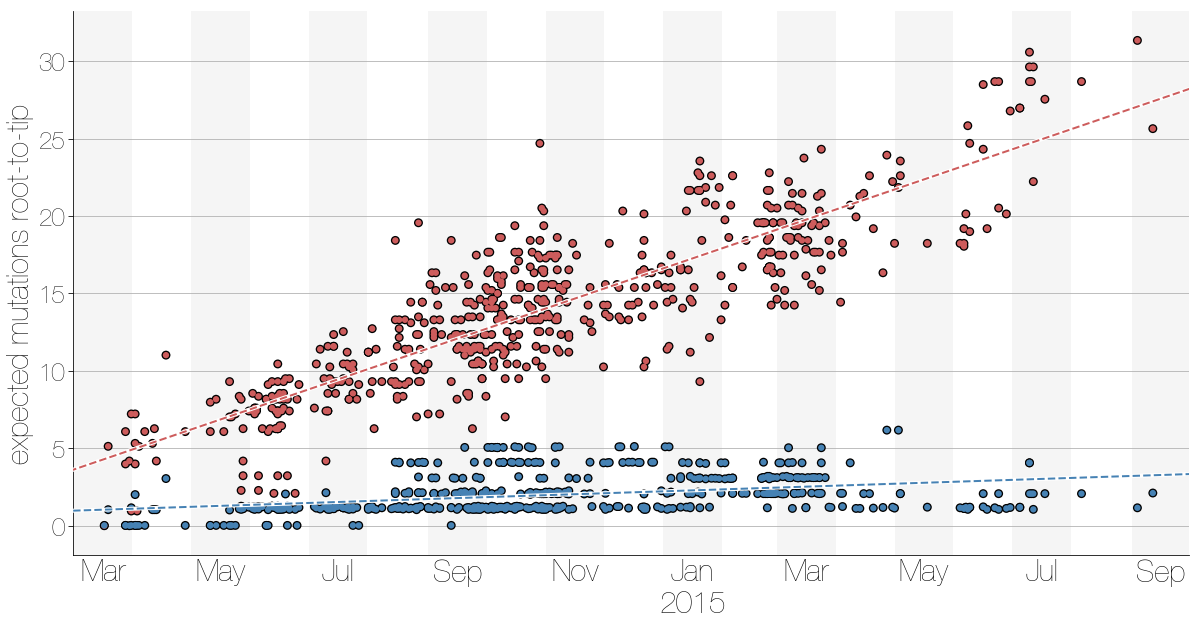

In [23]:
fig = plt.figure(figsize=(20,10),facecolor='w')
gs = gridspec.GridSpec(1, 1,hspace=0.0,wspace=0.0)

ax = plt.subplot(gs[0])


#########################

tipSize=20 ## tip circle radius
branchWidth=2 ## line width for branches

for t,tr in enumerate([pruned_genomic,pruned_gp]):
#     ax=plt.subplot(gs[0])
    c=['indianred','steelblue'][t]
    alignment=['genomic','GP'][t]
    L=[18997,2031][t]

    tips=[k for k in tr.Objects if k.branchType=='leaf']
    xs=[bt.decimalDate(k.numName.split('|')[-1]) for k in tips]
    ys=[k.height*L for k in tips]
    ax.scatter(xs,ys,s=40,zorder=100,facecolor=c, edgecolor='none')
    ax.scatter(xs,ys,s=80,zorder=99,facecolor='k', edgecolor='none')

    slope,intercept,r,p,err=linregress(xs,ys)
    regression_xs=np.linspace(bt.decimalDate('2013-12-01'),bt.decimalDate('2015-11-01'),10)
    ax.plot(regression_xs,[x*slope+intercept for x in regression_xs],ls='--',lw=2,color=c,zorder=102)
    ax.plot(regression_xs,[x*slope+intercept for x in regression_xs],ls='-',lw=4,color='w',zorder=101)
    
    effects=[path_effects.Stroke(linewidth=3, foreground='w'),
                 path_effects.Stroke(linewidth=1, foreground=c)] ## black text, white outline
#     rtt.text(bt.decimalDate('2014-03-01'),0.003-t*0.0002,r'slope = %.2fe-3 s/s/y, r-sq = %.2f'%(slope*1000.0,r**2),size=30,ha='left',va='top',path_effects=effects)
    
    print '%s slope: %.4f r: %.2f error: %.4f'%(alignment,slope,r,err)
    
    ax.xaxis.tick_bottom() ## tick bottom
    ax.yaxis.tick_left() ## tick left
    
#     ax.tick_params(size=0,labelsize=0)
    ax.spines['top'].set_visible(False) ## make axes invisible
    ax.spines['right'].set_visible(False)
#     ax.spines['left'].set_visible(False)
#     ax.spines['bottom'].set_visible(False)
    ax.grid(axis='y')
####################


xDates=['2013-%02d-01'%x for x in range(11,13)] ## create a timeline centered on each month
xDates+=['2014-%02d-01'%x for x in range(1,13)]
xDates+=['2015-%02d-01'%x for x in range(1,12)]

[ax.axvspan(bt.decimalDate(xDates[x]),bt.decimalDate(xDates[x])+1/float(12),facecolor='k',edgecolor='none',alpha=0.04) for x in range(0,len(xDates),2)] ## grey vertical bar every second month
ax.set_xticks([bt.decimalDate(xDates[x])+1/24.0 for x in range(0,len(xDates),2)]) ## x ticks in the middle of each month
ax.set_xticklabels([bt.convertDate(xDates[x],'%Y-%m-%d','%b\n%Y') if xDates[x].split('-')[1]=='01' else bt.convertDate(xDates[x],'%Y-%m-%d','%b') for x in range(0,len(xDates),2)]) ## labels in mmm format unless January: then do YYYY-mmm

# rtt.spines['top'].set_visible(False) ## make axes invisible
# # rtt.spines['right'].set_visible(False)
# rtt.spines['left'].set_visible(False)
# rtt.spines['bottom'].set_visible(False)

ax.set_ylabel('expected mutations root-to-tip',size=30)
# rtt.yaxis.set_label_position('right')
# rtt.yaxis.tick_right()

ax.tick_params(axis='x',labelsize=30,size=0) ## no axis labels visible except for timeline
ax.tick_params(axis='y',size=5,labelsize=24)

ax.grid(axis='y')
# rtt.set_ylim(-0.0001,pruned_gp.treeHeight*1.05)
ax.set_xlim(bt.decimalDate(xDates[4]),bt.decimalDate(xDates[-2]))
# plt.savefig('/Users/evogytis/Documents/genomic-horizon/supp_figures/sfigX_rtt.png',dpi=300,bbox_inches='tight')
plt.show()

In [70]:
ll=bt.tree()
bt.make_tree(open(root_path+'trees/Makona_600_gp.rooted.tree').readline(),ll)
ll.root.children[-1].length=0.0
# ll=ll.collapseBranches(lambda x:x.height!=None and x.length==0.0)
ll.sortBranches(descending=True)
ll.treeStats()

ll=bt.tree()
bt.make_tree(open(root_path+'trees/Makona_600_gp.raxml.tree').readline(),ll)
ll.root.children[-1].length=0.0
# ll=ll.collapseBranches(lambda x:x.height!=None and x.length==0.0)
ll.sortBranches(descending=True)
ll.treeStats()

# ll=bt.tree()
# bt.make_tree(open(root_path+'trees/Makona_600_gp.tt_dated.tree').readline(),ll)
# ll.root.children[-1].length=0.0
# ll=ll.collapseBranches(lambda x:x.height!=None and x.length==0.0)
# ll.sortBranches(descending=True)
# ll.treeStats()


Tree height: 0.003500
Tree length: 0.079780
multitype tree
annotations present

Numbers of objects in tree: 642 (42 nodes and 600 leaves)


Tree height: 0.003497
Tree length: 0.079726

Numbers of objects in tree: 641 (41 nodes and 600 leaves)



In [70]:
# PB1=(0.2981622478541206, 0.44644367598435458, 0.64719724652229571)
# PB2=(0.28098424626331703, 0.63955403192370541, 0.39507882933990629)
# PA=(0.8162552973803352, 0.41062668737243202, 0.29078047883276847)
# HA=(0.88366013765335083, 0.77908497055371606, 0.18562091886997223)
# NP=(0.8, 0.4745098039215686, 0.6549019607843137)
# NA=(0.4666666666666667, 0.7450980392156863, 0.8588235294117647)
# MP=(0.49803923567136127, 0.43267975250879925, 0.52287583549817396)
# NS=(0.8, 0.7552941176470589, 0.5929411764705883)
# colours=[PB1,PB2,PA,HA,NP,NA,MP,NS]
# # for col in colours:
# #     print '"%%%s",'%(mpl.colors.rgb2hex(col)),
# #     print ,
# print [r'%s'%(mpl.colors.rgb2hex(col)) for col in colours]
# print ','.join(['"%%%s"'%(mpl.colors.rgb2hex(col)) for col in colours])

[u'#4c72a5', u'#48a365', u'#d0694a', u'#e1c72f', u'#cc79a7', u'#77bedb', u'#7f6e85', u'#ccc197']
"%#4c72a5","%#48a365","%#d0694a","%#e1c72f","%#cc79a7","%#77bedb","%#7f6e85","%#ccc197"
